## By : Aryan Yash :: email : aryanyashishere@gmail.com

In [1]:
import numpy as mp 
import pandas as pd 
import seaborn as sns


C:\Users\DELL\AppData\Local\Temp\ipykernel_13844\4022734793.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# 1. Data Cleaning 

In [9]:
# to check if there are any null values or not null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# we should drop these null columns as these are very small in number 
df.drop(columns=  ['Unnamed: 2', 'Unnamed: 3',  'Unnamed: 4'], inplace= True)

In [17]:
df.sample(5)

,v1,v2
1341,ham,Just chill for another 6hrs. If you could slee...
4420,ham,Still at west coast... Haiz... ÌÏ'll take fore...
5021,ham,Yes its possible but dint try. Pls dont tell t...
4720,ham,"Yup. Anything lor, if u dun wan it's ok..."
2405,ham,I'm meeting Darren...


In [21]:
#we should rename the column names 
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace= True)

In [22]:
df.sample(5)

,target,text
2821,spam,ROMCAPspam Everyone around should be respondin...
221,ham,There is os called ubandu which will run witho...
3306,ham,Set a place for me in your heart and not in yo...
2545,ham,So are you guys asking that i get that slipper...
157,ham,"Hello, my love. What are you doing? Did you ge..."


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
# encoding the target of spam and not spam with numbers 

In [25]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
df['target'] = encoder.fit_transform(df['target'])

In [27]:
df.sample(5)

,target,text
3934,0,You need to get up. Now.
1606,0,Ok no prob... I'll come after lunch then...
5163,0,Ok leave no need to ask
3792,0,Hey are you angry with me. Reply me dr.
5107,0,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...


In [28]:
# to check the misssing values 

In [29]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
# so there is no missing values 

In [31]:
#we always should check for the duplicate values 

In [32]:
df.duplicated().sum()

403

In [33]:
# lets remove the duplicate values from it 

In [35]:
df = df.drop_duplicates(keep = 'first')

In [36]:
df.duplicated().sum()

0

# EDA

In [37]:
# we have to check that how many are there spams and not spams (Hams)

In [39]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [40]:
# to visualise it more clearly we will create a pie chart with percentages 

In [41]:
import matplotlib.pyplot as plt 

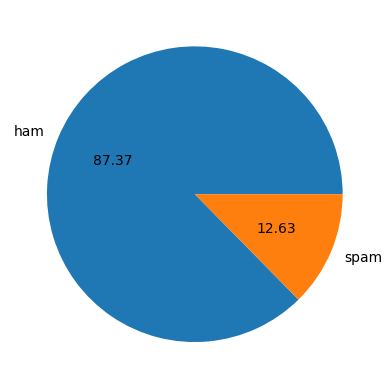

In [47]:
plt.pie(df['target'].value_counts(), labels= ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [48]:
# so the data is IMBALANCED 

In [49]:
# for deeper analysis we have to check how many characters , alphabets, and sentences does the text contains 

In [50]:
# for that we have to import a library nltk and download punkt

In [51]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 165.2 kB/s eta 0:00:10
      --------------------------------------- 0.0/1.5 MB 187.9 kB/s eta 0:00:08
     - -------------------------------------- 0.1/1.5 MB 328.2 kB/s eta 0:00:05
     ----------- ---------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
     ------------------------------ --------- 1.2/1.5 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 5.0 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  

In [52]:
import nltk 

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [54]:
# we have to make 3 columns  counting characters, counting words and counting sentences

In [58]:
df['num_characters']= df['text'].apply(len)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13844\3630017924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [59]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_13844\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [63]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [64]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_13844\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [66]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
#ham describe
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
#spam descibe
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

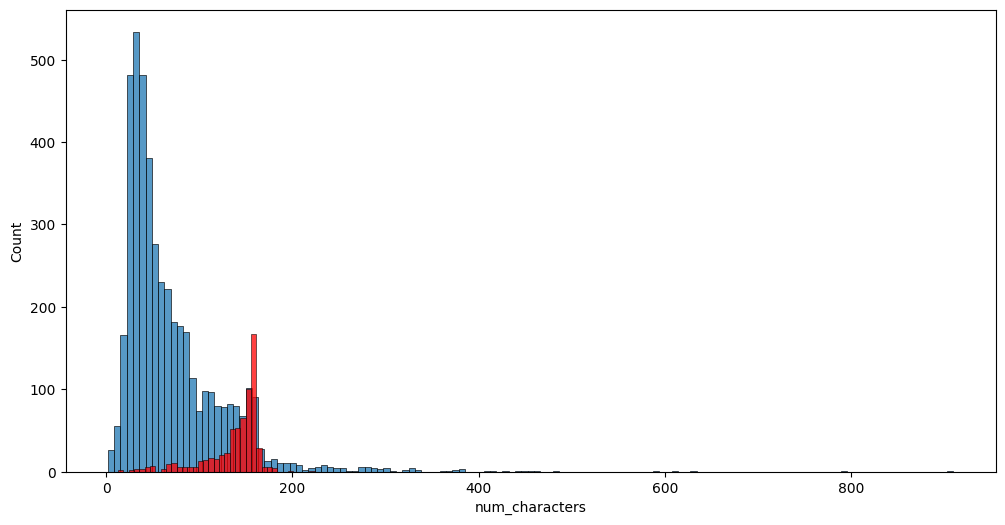

In [82]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

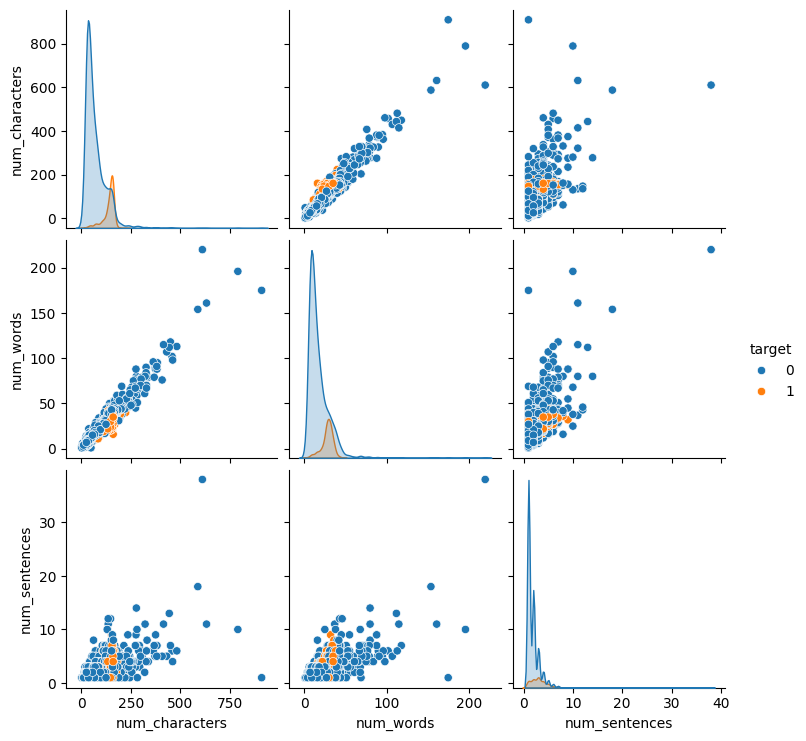

In [83]:
sns.pairplot(df, hue= 'target')

<Axes: >

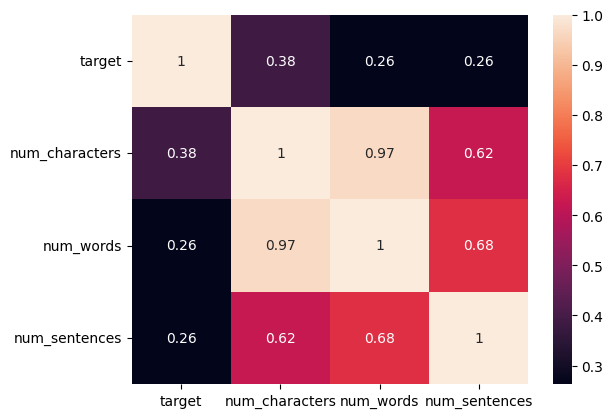

In [90]:
# now the pairplot and correlation 
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot= True)

## 3. Data Preprocessing Lower case 
Tokenizati  n
Removing special charact  rs
Removing stop words and punctun ion
Ste

mming

In [100]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
# nltk.download('stopwords')

from nltk.corpus import stopwords
import string

In [101]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [102]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [103]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13844\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [105]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [107]:
# spam wordcloud most used words
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


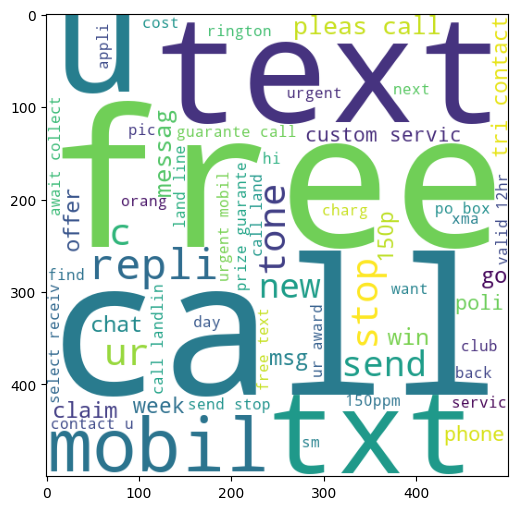

In [108]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [109]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


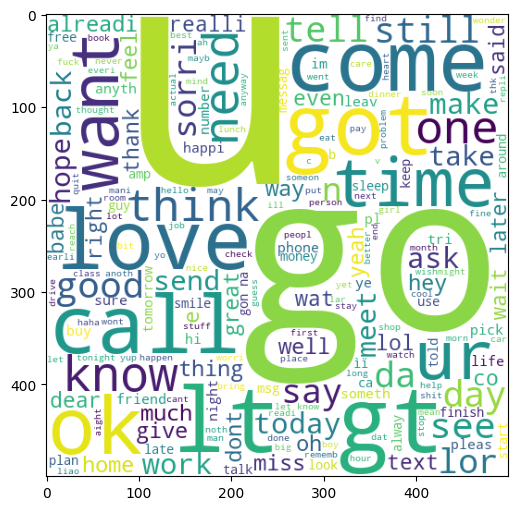

In [110]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [111]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [112]:
#to find the most used words in spams and hams 

In [113]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [114]:
len(spam_corpus)

9939

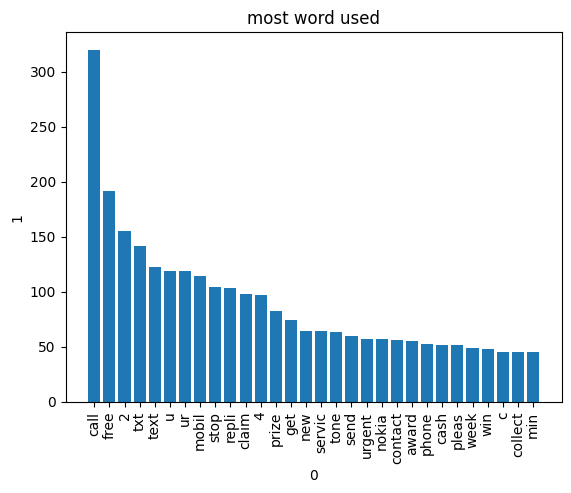

In [127]:
from collections import Counter




plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Set the title and labels
plt.title("most word used")
plt.xlabel("0")
plt.ylabel("1")
plt.xticks(rotation = 'vertical')

# Show the plot
plt.show()

In [128]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

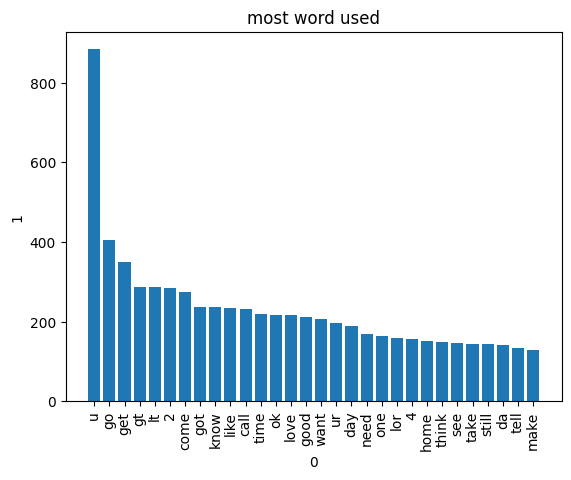

In [129]:



plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

# Set the title and labels
plt.title("most word used")
plt.xlabel("0")
plt.ylabel("1")
plt.xticks(rotation = 'vertical')

# Show the plot
plt.show()

### Text Vectorisation 
### using Bag of Words

In [130]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# by Counter Vectorisation

In [131]:
X_cv = cv.fit_transform(df['transformed_text']).toarray()


In [133]:
X_cv.shape

(5169, 6708)

In [134]:
y = df['target'].values

In [135]:
from sklearn.model_selection import train_test_split


In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size=0.2,random_state=2)


In [137]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [138]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("By Counter vectorisation : ")
print("accuracy Score : ", accuracy_score(y_test,y_pred1))
print("confucsion matrix: ", confusion_matrix(y_test,y_pred1))
print("precision_score: ", precision_score(y_test,y_pred1))

By Counter vectorisation : 
accuracy Score :  0.8800773694390716
confucsion matrix:  [[792 104]
 [ 20 118]]
precision_score:  0.5315315315315315


In [139]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("By Counter vectorisation : ")
print("accuracy Score : ", accuracy_score(y_test,y_pred1))
print("confucsion matrix: ", confusion_matrix(y_test,y_pred1))
print("precision_score: ", precision_score(y_test,y_pred1))

By Counter vectorisation : 
accuracy Score :  0.9642166344294004
confucsion matrix:  [[871  25]
 [ 12 126]]
precision_score:  0.8344370860927153


In [140]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("By Counter vectorisation : ")
print("accuracy Score : ", accuracy_score(y_test,y_pred1))
print("confucsion matrix: ", confusion_matrix(y_test,y_pred1))
print("precision_score: ", precision_score(y_test,y_pred1))

By Counter vectorisation : 
accuracy Score :  0.9700193423597679
confucsion matrix:  [[893   3]
 [ 28 110]]
precision_score:  0.9734513274336283


# by tfidf

In [141]:
# BY tfidf
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()


In [143]:
X_tfidf.shape

(5169, 3000)

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=2)


In [145]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [146]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("By Counter vectorisation : ")
print("accuracy Score : ", accuracy_score(y_test,y_pred1))
print("confucsion matrix: ", confusion_matrix(y_test,y_pred1))
print("precision_score: ", precision_score(y_test,y_pred1))

By Counter vectorisation : 
accuracy Score :  0.8694390715667312
confucsion matrix:  [[788 108]
 [ 27 111]]
precision_score:  0.5068493150684932


In [147]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("By Counter vectorisation : ")
print("accuracy Score : ", accuracy_score(y_test,y_pred1))
print("confucsion matrix: ", confusion_matrix(y_test,y_pred1))
print("precision_score: ", precision_score(y_test,y_pred1))

By Counter vectorisation : 
accuracy Score :  0.9709864603481625
confucsion matrix:  [[896   0]
 [ 30 108]]
precision_score:  1.0


In [148]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("By Counter vectorisation : ")
print("accuracy Score : ", accuracy_score(y_test,y_pred1))
print("confucsion matrix: ", confusion_matrix(y_test,y_pred1))
print("precision_score: ", precision_score(y_test,y_pred1))

By Counter vectorisation : 
accuracy Score :  0.9835589941972921
confucsion matrix:  [[895   1]
 [ 16 122]]
precision_score:  0.991869918699187


In [150]:
# after lots of model checking we can see that tfidf vectorisation and mnb model is best in preccision and much better in accuracy score 
#we are preferring mnb cause data is imbalanced and precision matters in this case

In [149]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))